In [15]:
#!pip install EnsemblePursuit
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from sklearn.preprocessing import MinMaxScaler

In [4]:
data_path='/media/maria/DATA1/Documents/data_for_suite2p/TX39/'
dt=1
spks= np.load(data_path+'spks.npy')
print('Shape of the data matrix, neurons by timepoints:',spks.shape)
iframe = np.load(data_path+'iframe.npy') # iframe[n] is the microscope frame for the image frame n
ivalid = iframe+dt<spks.shape[-1] # remove timepoints outside the valid time range
iframe = iframe[ivalid]
S = spks[:, iframe+dt]
print(S.shape)
#Uncomment to compute U and V
#ep=EnsemblePursuit(n_components=50,lam=0.01,n_kmeans=50)
#model=ep.fit(S.T[:10000,:])
#V=model.components_
#U=model.weights
#np.save('U.npy',U)

Shape of the data matrix, neurons by timepoints: (18795, 30766)
(18795, 30560)


In [5]:
U=np.load('U.npy')

In [21]:
stim_ens_ind=np.nonzero(U[:,13])[0][0]
print(S.max())
stim_inp=S[stim_ens_ind]
print(stim_inp.shape)
scaler=MinMaxScaler()
stim_inp=scaler.fit_transform(stim_inp.reshape(-1,1))

5689.182
(30560,)


[[0.01597081]
 [0.34601653]
 [0.34481776]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
(1, 0)
[0.01597081]
[0.34601653]
[0.34481776]
[0.18953711]
[0.17947061]
[0.11090592]
[0.31532148]
[0.09752194]
[0.08408416]
[0.]
[0, array([-0.00127723], dtype=float32), array([-0.02523592], dtype=float32), array([-0.04889347], dtype=float32), array([-0.06288067], dtype=float32), array([-0.0760231], dtype=float32), array([-0.08399265], dtype=float32), array([-0.10549251], dtype=float32), array([-0.11214189], dtype=float32), array([-0.11768451], dtype=float32), array([-0.11650766], dtype=float32)]


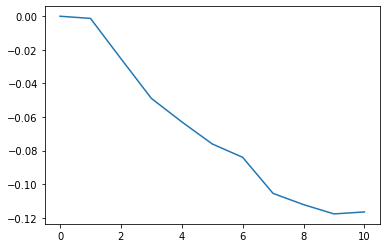

In [58]:
def gain_function(x):
        #x=np.array(x)
        #x[x<0]= 0.5*np.tanh(x[x<0]/0.5)
        if x<0:
            return 0.5*np.tanh(x/0.5)
        else:
            return (1-5)*np.tanh(x/(1.0-0.5))
        #x[x>=0]=(1.0-0.5)*np.tanh(x[x>=0]/(1.0-0.5))
        return x
    
def update_weights(pre_syn_activity_pattern,post_syn_activity_pattern,W,theta_BCM):
    alpha = 0.01
    #print('syn',pre_syn_activity_pattern.reshape(9479,1)@post_syn_activity_pattern.reshape(1,2))
    W+= alpha*pre_syn_activity_pattern*post_syn_activity_pattern*(post_syn_activity_pattern-theta_BCM)
    return W
def update_BCM_threshold(theta_BCM,activity_pattern):
    theta_BCM_dt = .01
    BCM_target = 0.6
    theta_BCM += theta_BCM_dt*((activity_pattern/BCM_target)*activity_pattern - theta_BCM)
    return theta_BCM

activity_patterns=stim_inp
print(activity_patterns)
#plt.plot(activity_patterns)
weight=1.0

print(weights.shape)
theta_BCM = 1000.0
rate=[0]
h=0.01
for t in range(0,10):
    #print(activity_patterns[t])
    inpt=weight*activity_patterns[t]
    print(inpt)
    dxdt=(-rate[-1]+gain_function(inpt))
    #print(dxdt)
    rate.append(rate[-1]+h*dxdt)
    weights=update_weights(activity_patterns.flatten()[t],rate[-1],weights,theta_BCM)
    theta_BCM=update_BCM_threshold(theta_BCM,rate[-1])
print(rate)
plt.plot(rate)